In [14]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

import pickle
from CONSTANTS import *
from Utils.helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


17it [00:06,  2.67it/s]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


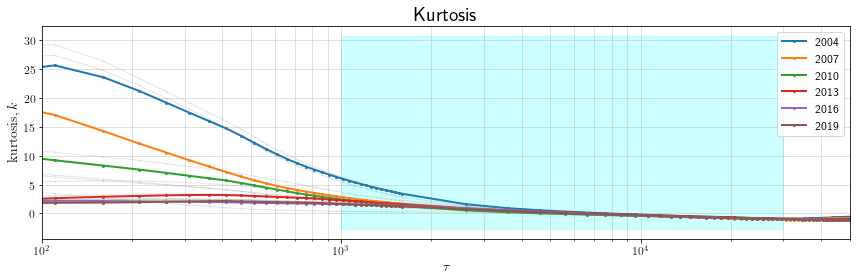

In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pickle
from scipy.stats import skew, kurtosis


# Loop over the years and create the KL divergence plots
total = []
for i, year in tqdm(enumerate(years)):
    kurtoses = []
    for tau in taus:
        mode = "normalized"
        with open(f"{path}Correlations/corr_res_{year}_{tau}.pkl", "rb") as f:
            response = pickle.load(f)
            correlation_matrix = response[mode]
            indices = np.triu_indices_from(correlation_matrix, k=1)
            real_series = correlation_matrix[indices]
            x = real_series.flatten()
            f = np.ravel(x).astype(float)
            f=f.reshape(-1,1)
            kurt = kurtosis(f)
            kurtoses.append(kurt)
    total.append(kurtoses)

fig, axes = plt.subplots(figsize=(12, 4))
plt.rc('text', usetex=True)
axes = plot([taus]*len(total), total, years, r"$\tau$", r"$\mathrm{kurtosis}, k$", "Kurtosis", highlight_x = (1000, 30000), dpi=300, log_x = True, log_y = False, axes = axes, plot_scaling=True, plot_kurt=True) 

plt.tight_layout()
plt.savefig("kurt.pdf", bbox_inches='tight')
plt.show()